# Linear regression

## Why modelling data?

<img src="figures/data-science-model.png" width="500px" heigth="500px">

*What is modelling?*

A statistical model is a mathematical model (i.e., a description of a system or process expressed in mathematical terms), typically specified as a relationship between input variables (or features, or independent variables) and an output (dependent) variable. Given a model or a family of models, data are used to find good configurations of it via training or fitting (i.e., ending with a configuration such that the output variable is predicted well from the input variables).

*Why modelling?*

Statistical models are used for:
* Prediction: based on past data, we fit a model, which we use to predict on future data. This is the primary objective of Machine Learning.
* Inspection: we use some data to fit a model and inspect it, in order to understand how different variables interact and contribute to the prediction of the output.

Note that statistical or data-driven modelling, which attempts to summarize or describe some existing observations, is not the only way to model. Theory-driven modelling can be used instead, by formalizing a certain understanding of a system into theory taking mathematical form, such as we do in physics, and then testing its predictions via observation or experiment.

For more see:
* https://hdsr.mitpress.mit.edu/pub/9qsbf3hz
* http://www2.math.uu.se/~thulin/mm/breiman.pdf

Topics:
1. Linear regression model
2. Closed-form analytic solution
3. Stochastic Gradient Descent solution
4. Implementations
5. Examples

In [4]:
# imports
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import os, codecs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Linear regression model

* **Regression**: predict real/continuous values given inputs (e.g., a salary of 2.15 ducats a year).
* **Classification**: predict categorical values given inputs (e.g., is there a female guarantor in the contract or not).

Model (3.1.2):

$y = \sum_{j=1}^{d}w_j x_j + b$

Or, in matrix form (3.1.4):

$y = Xw + b$

**Closed-form analytic solution** (3.1.9), where we merge $b$ into $w$:

$w = \Big(X^TX\Big)^{-1}X^Ty$

And new predictions are done as follows:

$\hat{y} = w^Tx$

In [5]:
# Let's start with a toy example

mean = [0, 0] # means (centers of mass)
cov = [[5, 0], [120, 100]]  # covariance

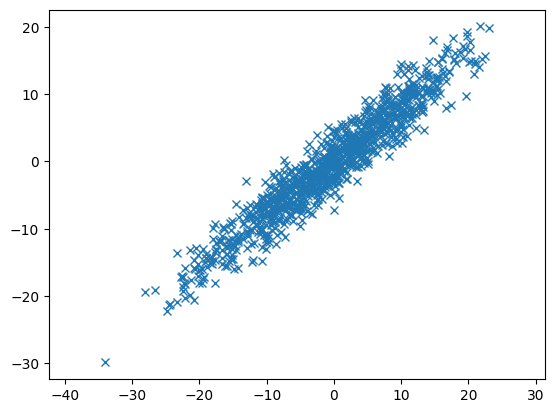

In [18]:
import matplotlib.pyplot as plt
x, y = np.random.multivariate_normal(mean, cov, 1000, check_valid='ignore').T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

In [21]:
np.corrcoef(x,y)

array([[1.       , 0.9581519],
       [0.9581519, 1.       ]])

In [22]:
# Let's fit a linear model to the data at hand

beta = 1/(np.matmul(x.T,x)) * np.matmul(x.T,y)

In [23]:
beta # in this 2d example this is just the slope of the line!

np.float64(0.7902059900475563)

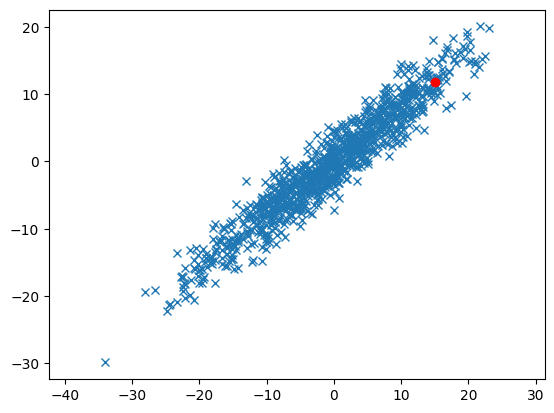

In [24]:
new_point = 15
y_hat = beta * new_point
plt.plot(x, y, 'x')
plt.plot(new_point, y_hat, 'o', c='red')
plt.axis('equal')
plt.show()

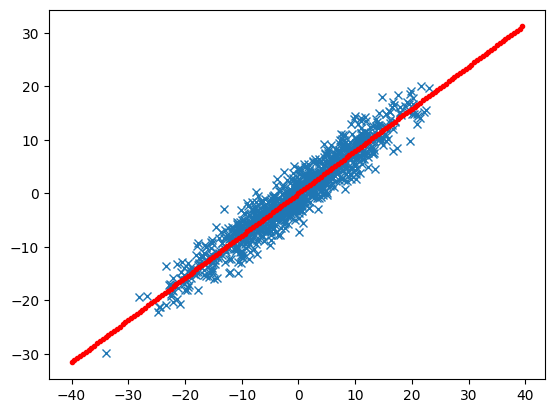

In [25]:
new_points = np.arange(-40,40,0.5)
predictions = beta * new_points
plt.plot(x, y, 'x')
plt.plot(new_points, predictions, '.', c='red')
#plt.axis('equal')
plt.show()

In [9]:
#new_points

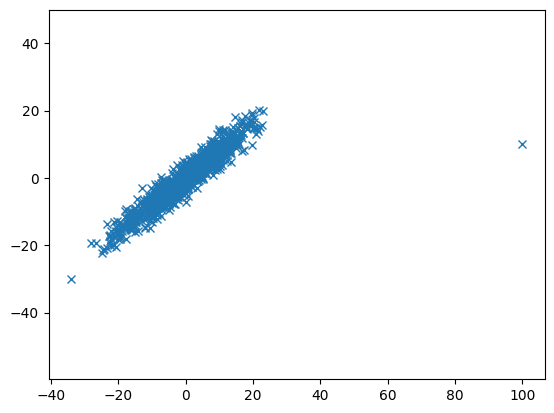

In [45]:
# Let's add an outlier

x[0] = 100
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

In [46]:
# Let's fit a linear model to the data again

beta = 1/(np.matmul(x.T,x)) * np.matmul(x.T,y)

In [47]:
beta

np.float64(0.7245333117970133)

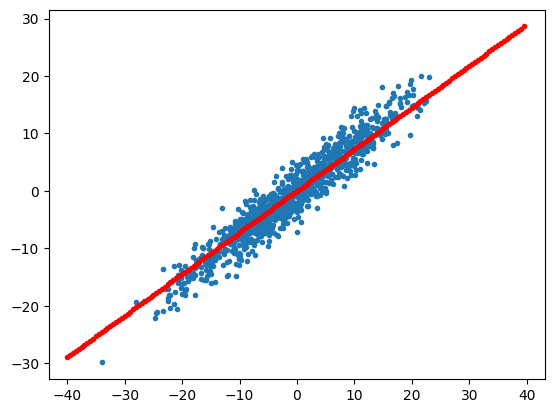

In [58]:
new_points = np.arange(-40,40,0.5)
predictions = beta * new_points
plt.plot(x, y, '.')
plt.plot(new_points, predictions, '.', c='red')
plt.axis('equal')
plt.xlim((-40,40))
plt.show()

In [93]:
# An example with the intercept

mean = [0, 15] # means (centers of mass)
cov = [[5, 0], [120, 100]]  # covariance

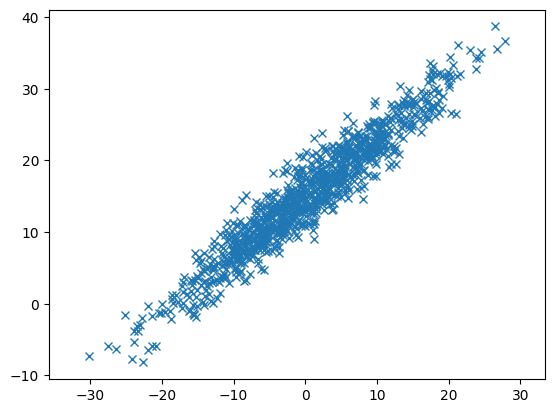

In [94]:
x, y = np.random.multivariate_normal(mean, cov, 1000, check_valid='ignore').T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

In [95]:
# Let's fit a linear model to the data at hand

beta = 1/(np.matmul(x.T,x)) * np.matmul(x.T,y)

In [96]:
beta

np.float64(0.8485748975944918)

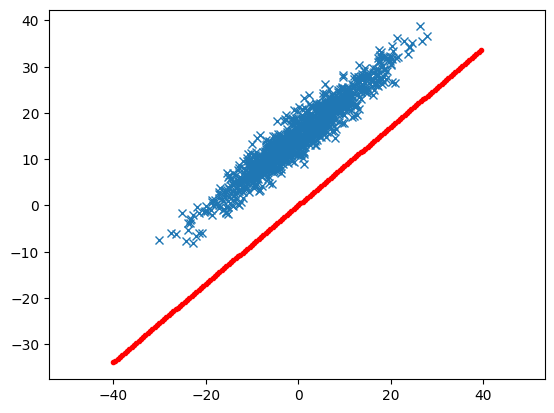

In [97]:
new_points = np.arange(-40,40,0.5)
predictions = beta * new_points
plt.plot(x, y, 'x')
plt.plot(new_points, predictions, '.', c='red')
plt.axis('equal')
plt.show()

This does not work any longer, as the default intercept is at 0,0. We need to fit for the intercept as well as for the slope.

In [98]:
# Let's use a trick and add a new column to x, all to 1: this will allow us to fit for the intercept as well

X = np.matrix([np.ones(x.shape[0]),x]).T

In [101]:
print(X.shape)
print(X[:10,:])

(1000, 2)
[[ 1.         17.33795095]
 [ 1.         17.85063021]
 [ 1.         16.89349452]
 [ 1.         13.40655846]
 [ 1.         -1.15169356]
 [ 1.          1.580768  ]
 [ 1.          9.40412944]
 [ 1.         11.22523545]
 [ 1.         -8.38851481]
 [ 1.          1.01887096]]


In [102]:
# This is the same as above, but we need a little bit more machinery to deal with matrices

betas = np.linalg.inv(np.matmul(X.T,X)) @ np.matmul(X.T,y).T

In [22]:
betas

matrix([[14.95631239],
        [ 0.79482201]])

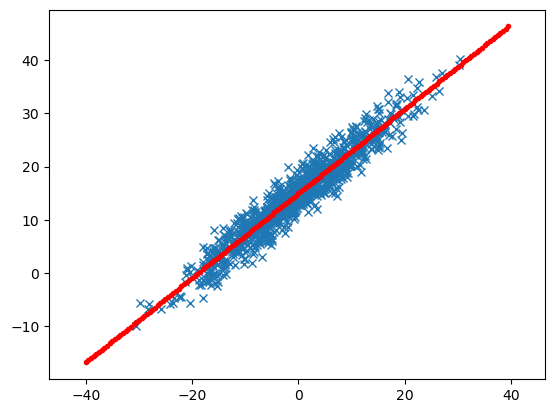

In [23]:
new_points = np.arange(-40,40,0.5)
predictions = betas[1,0] * new_points
plt.plot(x, y, 'x')
plt.plot(new_points, betas[0,0] + predictions, '.', c='red')
plt.axis('equal')
plt.show()

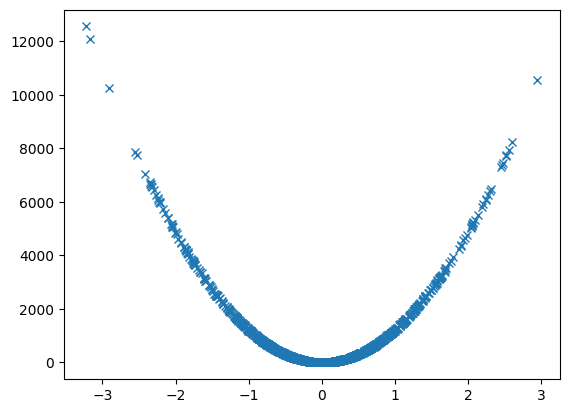

In [108]:
# Consider the following dataset
from sklearn.datasets import make_regression # a simpler way to create regression data
x, y = make_regression(n_samples=1000, n_features=1, noise=0.2)
y = np.power(y,2)
plt.plot(x, y, 'x')
plt.show()

In [109]:
X = np.matrix([np.ones(x.shape[0]),x.ravel()]).T

In [110]:
X

matrix([[ 1.        , -1.0465872 ],
        [ 1.        ,  0.09404573],
        [ 1.        , -0.42949295],
        ...,
        [ 1.        , -1.004021  ],
        [ 1.        ,  0.00425369],
        [ 1.        ,  0.63432672]])

In [114]:
betas = np.linalg.inv(np.matmul(X.T,X)) @ np.matmul(X.T,y).T

In [115]:
betas

matrix([[1167.98977529],
        [-133.54482028]])

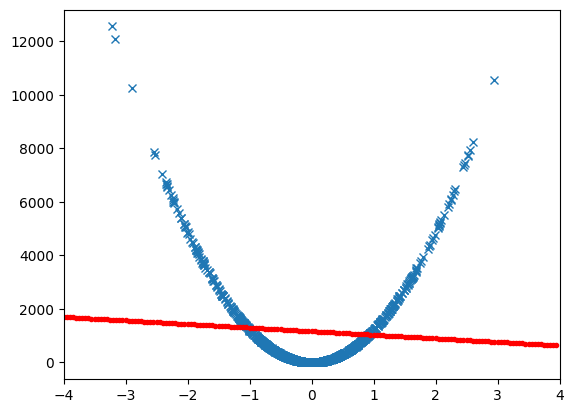

In [117]:
new_points = np.arange(-4,4,0.05)
predictions = betas[1,0] * new_points
plt.plot(x, y, 'x')
plt.plot(new_points, betas[0,0] + predictions, '.', c='red')
plt.xlim((-4,4))
plt.show()

### Questions

* What is the problem of applying linear regression to this dataset?
* Can you think of a solution, still using linear regression?

## Stochastic Gradient Descent (SGD)

Model:

$y = b + \sum_{j=1}^{d}w_j x_j$

Closed-form analytic solution (as before, we merge $b$ into $w$):

$w = \Big(X^TX\Big)^{-1}X^Ty$

Stochastic Gradient Descent (SGD), at a given step on a single datapoint $i$:

$w \leftarrow w - \eta \Big(\partial_{w} l^i(y,\hat{y}) \Big)$

Where:
* $\eta$ is the learning rate
* $\partial_{w}$ is the gradient (derivative) of the loss with respect to the model parameters $w$
* $l^i$ is the loss calculated for the training datapoint $i$

Remember that we use the squared loss, that for a single data point is defined as (3.1.5): $l^i(y,\hat{y}) = \frac{1}{2}\Big(\hat{y}^i - y^i\Big)^2$

When we have a *batch* of training data $B$ instead of a single data point, we simply average the gradients (3.1.10):

$w \leftarrow w - \frac{\eta}{|B|} \sum_{i \in B} \Big(\partial_{w} l^i(y,\hat{y}) \Big)$

At the end, we always use the model on new data points $x$ as follows:

$\hat{y} = w^Tx$

Going back to our example with a single feature plus intercept, and a batch of datapoints $B$, we have the following partial derivatives (3.1.11):

$b \leftarrow b - \frac{\eta}{|B|} \sum_{i \in B} \Big( w^Tx^i + b - y^i \Big)$

$w \leftarrow w - \frac{\eta}{|B|} \sum_{i \in B} x^i \Big( w^Tx^i + b - y^i \Big)$

Where $b$ is the coefficient for the intercept, and $w$ for the single feature we have.

In [118]:
# An example with the intercept

mean = [0, 15] # means (centers of mass)
cov = [[5, 0], [120, 100]]  # covariance

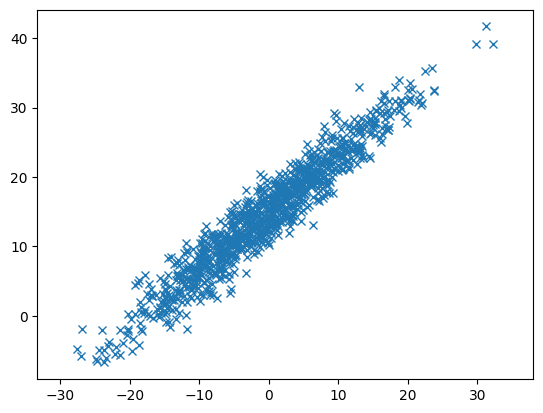

In [119]:
x, y = np.random.multivariate_normal(mean, cov, 1000, check_valid='ignore').T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

In [120]:
# Initialize parameters
beta0 = 0  # Intercept
beta1 = 0  # Slope
learning_rate = 0.001
n_iterations = 100
n = len(x)

# Stochastic Gradient Descent
for iteration in range(n_iterations):
    shuffled_indices = np.random.permutation(n)
    X_shuffled = x[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(n):
        xi = X_shuffled[i:i+1]
        yi = y_shuffled[i:i+1]
        gradients = xi * ((beta1 * xi + beta0) - yi)  # Derivative w.r.t beta1
        intercept_gradients = ((beta1 * xi + beta0) - yi)  # Derivative w.r.t beta0
        beta1 = beta1 - learning_rate * gradients
        beta0 = beta0 - learning_rate * intercept_gradients

# The model is y = beta0 + beta1*x
print(f"Model slope (m): {beta1}")
print(f"Model intercept (b): {beta0}")

Model slope (m): [0.87014912]
Model intercept (b): [14.99371334]


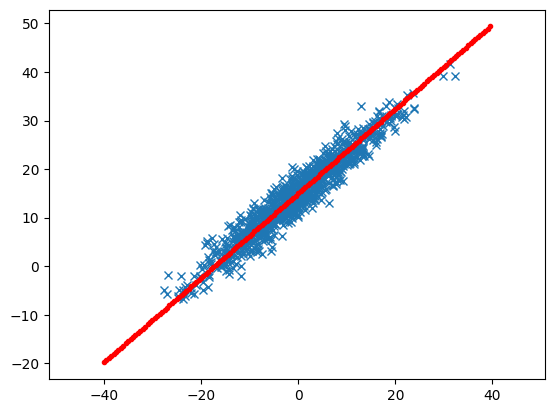

In [121]:
new_points = np.arange(-40,40,0.5)
predictions = beta1 * new_points
plt.plot(x, y, 'x')
plt.plot(new_points, beta0 + predictions, '.', c='red')
plt.axis('equal')
plt.show()

### Questions

* Try to vary the learning rate, what happens?
* Try to add one more feature to X, how to do it?
* Try to add an outlier, what happens?
* Implement using matrix multiplications.

## Implementations

We will now see an implementation with **sklearn**, and later we will use **pytorch** for the same model.

Sklearn provides easy access and a common API to a wealth of ML models.

In [34]:
from sklearn.linear_model import LinearRegression
x = x.reshape((len(x),1))
reg = LinearRegression().fit(x, y)
reg.score(x, y)

0.918104916119396

In [35]:
reg.coef_

array([0.79641681])

In [36]:
reg.intercept_

14.884755094391435

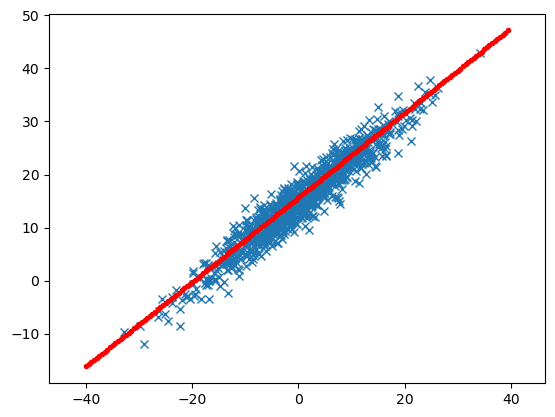

In [37]:
new_points = np.arange(-40,40,0.5)
new_points = new_points.reshape((len(new_points),1))
predictions = reg.predict(new_points)
plt.plot(x, y, 'x')
plt.plot(new_points, reg.coef_ + predictions, '.', c='red')
plt.axis('equal')
plt.show()

### Questions

* Implement the [SGD regression using Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor)
* Explore the topic of regularization (book section 3.7) and implement the [L1 (Lasso)](https://scikit-learn.org/stable/modules/linear_model.html#lasso) and [L2 (Ridge)](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification) regression variants
* Explore the [Sklearn library](https://scikit-learn.org) and try to use some of its models

---

## An example
As a working example, we use a dataset of contracts of apprenticeship from early modern Venice. Our goals will be to train a regression model from scratch using this dataset, to better understand the predictors of an apprentice's salary.

[See here for more information on this dataset](https://github.com/mromanello/ADA-DHOxSS/tree/master/data#contracts-of-apprenticeship-in-early-modern-venice).

In [38]:
root_folder = "data/apprenticeship_venice/"
df_contracts = pd.read_csv(codecs.open(os.path.join(root_folder,"professions_data.csv"), encoding="utf8"), sep=";")

Let's take a look at the dataset.

In [39]:
df_contracts.head(5)

,page_title,register,annual_salary,a_profession,profession_code_strict,profession_code_gen,profession_cat,corporation,keep_profession_a,complete_profession_a,...,personal_care_master,clothes_master,generic_expenses_master,salary_in_kind_master,pledge_goods_master,pledge_money_master,salary_master,female_guarantor,period_cat,incremental_salary
0,Carlo Della sosta (Orese) 1592-08-03,"asv, giustizia vecchia, accordi dei garzoni, 1...",NaN,orese,orese,orefice,orefice,Oresi,1,1,...,1,1,1,0,0,0,0,0,NaN,0
1,Antonio quondam Andrea (squerariol) 1583-01-09,"asv, giustizia vecchia, accordi dei garzoni, 1...",12.5,squerariol,squerariol,lavori allo squero,lavori allo squero,Squerarioli,1,1,...,0,0,1,0,0,0,1,0,1.0,0
2,Cristofollo di Zuane (batioro in carta) 1591-0...,"asv, giustizia vecchia, accordi dei garzoni, 1...",NaN,batioro,batioro,battioro,fabbricatore di foglie/fili/cordelle d'oro o a...,Battioro,1,1,...,0,0,0,0,0,0,0,0,NaN,0
3,Illeggibile (marzer) 1584-06-21,"asv, giustizia vecchia, accordi dei garzoni, 1...",NaN,marzer,marzer,marzer,merciaio,Merzeri,1,1,...,0,0,0,0,0,0,0,0,NaN,0
4,Domenico Morebetti (spechier) 1664-09-13,"asv, giustizia vecchia, accordi dei garzoni, 1...",7.0,marzer,marzer,marzer,merciaio,Merzeri,1,1,...,0,0,1,0,0,0,1,0,1.0,0


In [40]:
df_contracts.columns

Index(['page_title', 'register', 'annual_salary', 'a_profession',
       'profession_code_strict', 'profession_code_gen', 'profession_cat',
       'corporation', 'keep_profession_a', 'complete_profession_a',
       'enrolmentY', 'enrolmentM', 'startY', 'startM', 'length', 'has_fled',
       'm_profession', 'm_profession_code_strict', 'm_profession_code_gen',
       'm_profession_cat', 'm_corporation', 'keep_profession_m',
       'complete_profession_m', 'm_gender', 'm_name', 'm_surname',
       'm_patronimic', 'm_atelier', 'm_coords', 'a_name', 'a_age', 'a_gender',
       'a_geo_origins', 'a_geo_origins_std', 'a_coords', 'a_quondam',
       'accommodation_master', 'personal_care_master', 'clothes_master',
       'generic_expenses_master', 'salary_in_kind_master',
       'pledge_goods_master', 'pledge_money_master', 'salary_master',
       'female_guarantor', 'period_cat', 'incremental_salary'],
      dtype='object')

Every row represents an apprenticeship contract. Contracts were registered both at the guild's and at a public office. This is a sample of contracts from a much larger set of records.

Some of the variables we will work with are:
* `annual_salary`: the annual salary paid to the apprencice, if any (in Venetian ducats).
* `a_profession` to `corporation`: increasingly generic classifications for the apprentice's stated profession.
* `startY` and `enrolmentY`: contract start and registration year respectively.
* `length`: of the contract, in years.
* `m_gender` and `a_gender`: of master and apprentice respectively.
* `a_age`: age of the apprentice at entry, in years.
* `female_guarantor`: if at least one of the contract's guarantors was female, boolean.

### Feature selection

Let us focus on our regression task: predicting the salary of an apprentice given some other features of the contract. We need to select and inspect the variables to use, forming up our domain-specific model. The choice of the features, eventually their filtering and transformations, should be informed by our working hypothesis.

In [41]:
print(df_contracts.shape[0])

# select a few independent variables and drop NA
df_contracts = df_contracts.replace([np.inf, -np.inf], np.nan)
df_dataset = df_contracts[["annual_salary","length","a_age","female_guarantor","salary_master","incremental_salary"]].dropna()
# only pick contracts with a salary paid by the master to the apprentice
df_dataset = df_dataset[df_dataset.salary_master == 1]
print(df_dataset.shape[0])
df_dataset = df_dataset.drop("salary_master",axis=1)

9653
7258


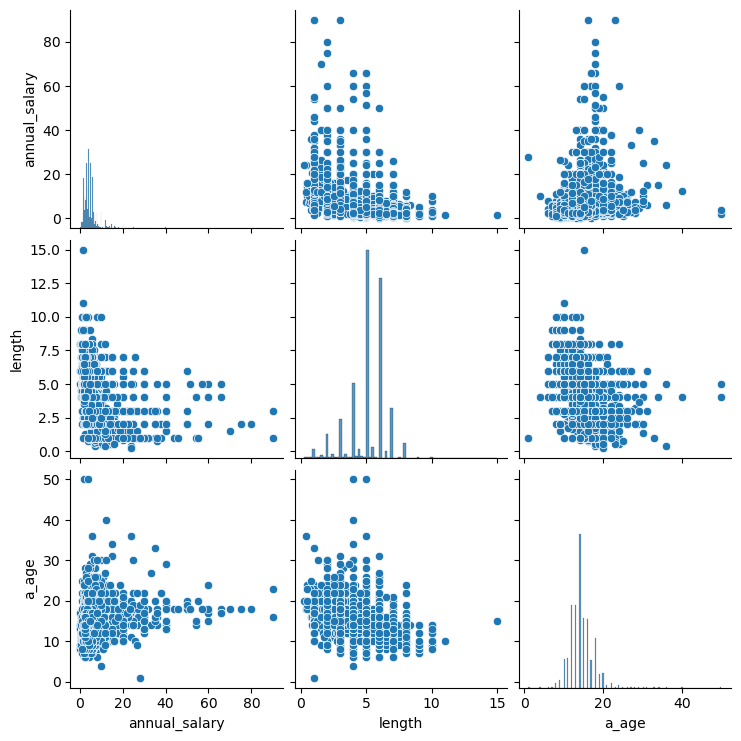

In [ ]:
# watch for correlations, but be wary of very high correlations: they might make the model fitting problematic (this is called 'multicollinearity')

sns.pairplot(df_dataset[["annual_salary","length","a_age"]])

### Fitting

Usually we do not use the closed-form solution to fit a model. We instead rely on existing packages which offer approximate and robust methods to fit a model. It is often a good idea, once the basics are clear, to turn to a more robust implementation.

[Statsmodels](https://www.statsmodels.org/stable/index.html) is a Python library exposing a variety of robust modelling solutions for inspection.

In [43]:
import statsmodels.api as sm

In [44]:
# Select dependent variable and add intercept

y = df_dataset[["annual_salary"]]
X = df_dataset.drop("annual_salary",axis=1)
X = sm.add_constant(X, prepend=False)

In [45]:
y.shape

(7258, 1)

In [46]:
X.shape

(7258, 5)

In [47]:
X

,length,a_age,female_guarantor,incremental_salary,const
1,2.0,20.0,0,0,1.0
4,1.0,20.0,0,0,1.0
5,6.0,16.0,0,0,1.0
6,8.0,8.0,0,0,1.0
9,5.0,14.0,0,0,1.0
...,...,...,...,...,...
9648,8.0,14.0,0,0,1.0
9649,7.0,13.0,1,0,1.0
9650,6.5,14.0,0,0,1.0
9651,4.0,14.0,0,0,1.0


In [48]:
# Fit model

mod = sm.OLS(y, X)
res = mod.fit()

In [49]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          annual_salary   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     443.0
Date:                Sun, 13 Oct 2024   Prob (F-statistic):               0.00
Time:                        08:47:14   Log-Likelihood:                -21368.
No. Observations:                7258   AIC:                         4.275e+04
Df Residuals:                    7253   BIC:                         4.278e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
length                -1.3712      0

Check this [guide on how to interpret results](https://www.geeksforgeeks.org/interpreting-the-results-of-linear-regression-using-ols-summary/).

---